In [4]:
from datasets import load_dataset
from sklearn.decomposition import PCA, SparsePCA
from matplotlib import pyplot as plt
import torch
import numpy as np

In [5]:
data = load_dataset("mksethi/sae-acts-llama31-8b-it")

README.md:   0%|          | 0.00/627 [00:00<?, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/901M [00:00<?, ?B/s]

data/train-00001-of-00002.parquet:   0%|          | 0.00/868M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/817 [00:00<?, ? examples/s]

#### Quick Sanity Check
see if we have all the samples from our data

In [6]:
len(data['train']['correct_sae_3_acts'])

817

In [7]:
layers = np.zeros((7, 817, 131072))

In [8]:
j = 0
for i in range(3,28,4):
    layers[j] = np.array(data["train"][f"correct_sae_{i}_acts"], dtype=np.float32)
    j += 1

In [9]:
# Initialize list for all first principal components of different layers
first_comp = []

In [10]:
for i in range(7):
    pca = PCA(n_components=5)
    pca.fit(layers[i])
    PC1 = pca.explained_variance_ratio_[0]
    first_comp.append(PC1)

In [11]:
first_comp

[0.998759904001885,
 0.9945997394062359,
 0.9872427872322396,
 0.9487104602608786,
 0.8914000746492152,
 0.811832813504479,
 0.7104846521061969]

In [12]:
y = [i for i in range(3,28,4)]

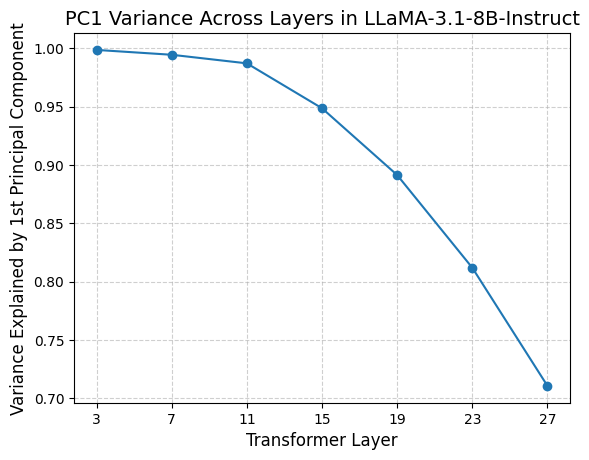

In [13]:
layers = [3, 7, 11, 15, 19, 23, 27]   # x values

plt.plot(layers, first_comp, marker="o")
plt.xlabel("Transformer Layer", fontsize=12)
plt.ylabel("Variance Explained by 1st Principal Component", fontsize=12)
plt.title("PC1 Variance Across Layers in LLaMA-3.1-8B-Instruct", fontsize=14)

plt.xticks(layers)

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()